# 项目：用线性回归预测房价数据

## 分析目标

此数据分析报告的目的是，基于已有的房屋销售价格，以及有关该房屋的属性，进行线性回归分析，从而利用得到的线性回归模型，能对以下未知售价的房屋根据属性进行价格预测：

面积为6500平方英尺，有4个卧室、2个厕所，总共2层，不位于主路，无客人房，带地下室，有热水器，没有空调，车位数为2，位于城市首选社区，简装修。

## 简介

数据集`house_price.csv`记录了超过五百栋房屋的交易价格，以及房屋的相关属性信息，包括房屋面积、卧室数、厕所数、楼层数、是否位于主路、是否有客房，等等。

`house_price.csv`每列的含义如下：
- price：房屋出售价格
- area：房屋面积，以平方英尺为单位
- bedrooms：卧室数
- bathrooms：厕所数
- stories：楼层数
- mainroad：是否位于主路
   - yes  是
   - no	  否
- guestroom：是否有客房
   - yes  是
   - no	  否
- basement：是否有地下室
   - yes  是
   - no	  否
- hotwaterheating：是否有热水器
   - yes  是
   - no	  否
- airconditioning：是否有空调
   - yes  是
   - no	  否
- parking：车库容量，以车辆数量为单位
- prefarea：是否位于城市首选社区
   - yes  是
   - no	  否
- furnishingstatus：装修状态
   - furnished       精装
   - semi-furnished	 简装
   - unfurnished     毛坯

### 读取数据

首先导入数据分析所需要的库：

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

使用pandas库里的read_csv函数读取csv文件，按照惯例将原数据赋值给original_data，并复制一份给cleaned_data，之后的操作将作用于cleaned_data。

In [2]:
original_data=pd.read_csv(r'C:\Users\31665\Desktop\pycharm\pandas\素材\house_price.csv')
cleaned_data=original_data.copy()

使用head函数输出前几行来查看基本数据。

In [3]:
cleaned_data.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished


### 评估和清洗数据

对original_data与original_data所包含数据进行评估和清洗。

主要从两个方面进行：结构和内容，即整洁度和干净度。

数据的结构性问题指的是不符合“每个变量是一列，每个观测值是一行，每种类型的观测单位是一个表格”的要求。数据的内容性问题指的是存在“数据丢失，数值重复，数据无效性”等的问题。

#### 数据1整齐度

这次使用head函数详细查看数据的整齐度，即结构性问题。

In [4]:
cleaned_data.head(10)

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished
5,10850000,7500,3,3,1,yes,no,yes,no,yes,2,yes,semi-furnished
6,10150000,8580,4,3,4,yes,no,no,no,yes,2,yes,semi-furnished
7,10150000,16200,5,3,2,yes,no,no,no,no,0,no,unfurnished
8,9870000,8100,4,1,2,yes,yes,yes,no,yes,2,yes,furnished
9,9800000,5750,3,2,4,yes,yes,no,no,yes,1,yes,unfurnished


表格中前10行数据都符合“每个变量是一列，每个观测值是一行，每种类型的观测单位是一个表格”的要求，因此不存在结构性问题。当然可以再随机抽取10行进行检查。

In [5]:
cleaned_data.sample(10)

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
106,6160000,5450,4,2,1,yes,no,yes,no,yes,0,yes,semi-furnished
523,2380000,2787,4,2,2,yes,no,no,no,no,0,no,furnished
481,2940000,2700,2,1,1,no,no,no,no,no,0,no,furnished
156,5523000,6900,3,1,1,yes,yes,yes,no,no,0,yes,semi-furnished
455,3129000,5495,3,1,1,yes,no,yes,no,no,0,no,unfurnished
306,4165000,4840,3,1,2,yes,no,no,no,no,1,no,semi-furnished
70,6790000,4000,3,2,2,yes,no,yes,no,yes,0,yes,semi-furnished
140,5740000,5800,3,2,4,yes,no,no,no,yes,0,no,unfurnished
454,3143000,4500,3,1,2,yes,no,no,no,yes,0,no,unfurnished
443,3220000,4320,3,1,1,no,no,no,no,no,1,no,unfurnished


随机样本也与上述描述相同，因此不存在结构性问题。

### 数据干净度

对于数据的干净度，即内容性问题，首先使用info()方法查看数据的基本信息。

In [6]:
cleaned_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   price             545 non-null    int64 
 1   area              545 non-null    int64 
 2   bedrooms          545 non-null    int64 
 3   bathrooms         545 non-null    int64 
 4   stories           545 non-null    int64 
 5   mainroad          545 non-null    object
 6   guestroom         545 non-null    object
 7   basement          545 non-null    object
 8   hotwaterheating   545 non-null    object
 9   airconditioning   545 non-null    object
 10  parking           545 non-null    int64 
 11  prefarea          545 non-null    object
 12  furnishingstatus  545 non-null    object
dtypes: int64(6), object(7)
memory usage: 55.5+ KB


从内容汇总可以看出，mainroad，guestroom，basement，hotwaterheating，airconditioning，prefarea，furnishingstatus都是字符串数据，而我们可以将其转换为category数据类型，既可以减少存储空间，又可以提高运算速度。



In [7]:
cleaned_data[["mainroad", "guestroom", "basement", "hotwaterheating", "airconditioning", "prefarea", "furnishingstatus"]]=cleaned_data[["mainroad", "guestroom", "basement", "hotwaterheating", "airconditioning", "prefarea", "furnishingstatus"]].astype("category")
cleaned_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype   
---  ------            --------------  -----   
 0   price             545 non-null    int64   
 1   area              545 non-null    int64   
 2   bedrooms          545 non-null    int64   
 3   bathrooms         545 non-null    int64   
 4   stories           545 non-null    int64   
 5   mainroad          545 non-null    category
 6   guestroom         545 non-null    category
 7   basement          545 non-null    category
 8   hotwaterheating   545 non-null    category
 9   airconditioning   545 non-null    category
 10  parking           545 non-null    int64   
 11  prefarea          545 non-null    category
 12  furnishingstatus  545 non-null    category
dtypes: category(7), int64(6)
memory usage: 30.3 KB


#### 处理缺失数据

因为house_price.csv中一共有545条数据，而每个变量都有545个值，因此不存在数据缺失的问题。

#### 处理重复数据

根据数据的含义以及内容来看，允许变量存在重复的观测值，因此不需要进行数据去重操作。

#### 处理不一致数据

下面使用value_counts函数来查看数据的基本信息以确定是否存在不一致数据。

In [8]:
cleaned_data['airconditioning'].value_counts()

airconditioning
no     373
yes    172
Name: count, dtype: int64

In [9]:
cleaned_data['basement'].value_counts()

basement
no     354
yes    191
Name: count, dtype: int64

In [10]:
cleaned_data['furnishingstatus'].value_counts()

furnishingstatus
semi-furnished    227
unfurnished       178
furnished         140
Name: count, dtype: int64

In [11]:
cleaned_data['hotwaterheating'].value_counts()

hotwaterheating
no     520
yes     25
Name: count, dtype: int64

In [12]:
cleaned_data['mainroad'].value_counts()

mainroad
yes    468
no      77
Name: count, dtype: int64

In [13]:
cleaned_data['prefarea'].value_counts()

prefarea
no     417
yes    128
Name: count, dtype: int64

从以上几条数据分析结果来看，都不存在数据不一致的情况。

#### 处理无效或错误数据

首先通过DataFrame的describe函数来查看数据的基本统计信息。

In [14]:
cleaned_data.describe()

,price,area,bedrooms,bathrooms,stories,parking
count,5.450000e+02,545.000000,545.000000,545.000000,545.000000,545.000000
mean,4.766729e+06,5150.541284,2.965138,1.286239,1.805505,0.693578
std,1.870440e+06,2170.141023,0.738064,0.502470,0.867492,0.861586
min,1.750000e+06,1650.000000,1.000000,1.000000,1.000000,0.000000
25%,3.430000e+06,3600.000000,2.000000,1.000000,1.000000,0.000000
50%,4.340000e+06,4600.000000,3.000000,1.000000,2.000000,0.000000
75%,5.740000e+06,6360.000000,3.000000,2.000000,2.000000,1.000000
max,1.330000e+07,16200.000000,6.000000,4.000000,4.000000,3.000000


由表格数据来看，其中并没有显著脱离实际意义的值，因此不存在错误或无效数据。

### 探索数据

在着手判断统计学分析之前，先借助数据可视化来探索数据变量的分布情况，以及与房价存在相关性的变量，为后续的分析提供方向。

#### 房价分步

In [15]:
sns.set_palette('pastel')

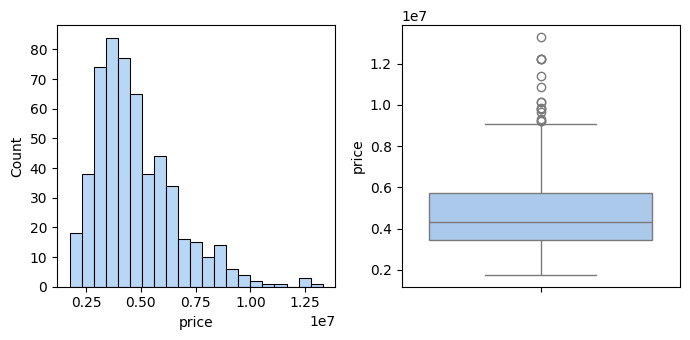

In [16]:
plt.rcParams['figure.autolayout'] = True
plt.rcParams['figure.figsize'] = [7.00,3.50]
figure,axes = plt.subplots(1,2)
sns.histplot(cleaned_data,x='price',ax=axes[0])
sns.boxplot(cleaned_data,y='price',ax=axes[1])
plt.show()

房价呈现右偏态分布，大部分的房子价格都集中在中等的价格区间内，而少数的房子价格则集中在高价格区间内，其使得均值被拉高。

### 面积分布

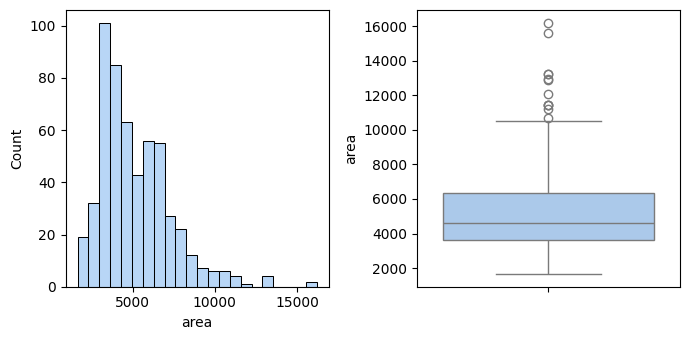

In [17]:
figure,axes = plt.subplots(1,2)
sns.histplot(cleaned_data['area'],ax=axes[0])
sns.boxplot(cleaned_data['area'],ax=axes[1])
plt.show()

面积的分布与房价相似，也呈现右偏态的分布。

### 房价与面积的关系

<Axes: xlabel='area', ylabel='price'>

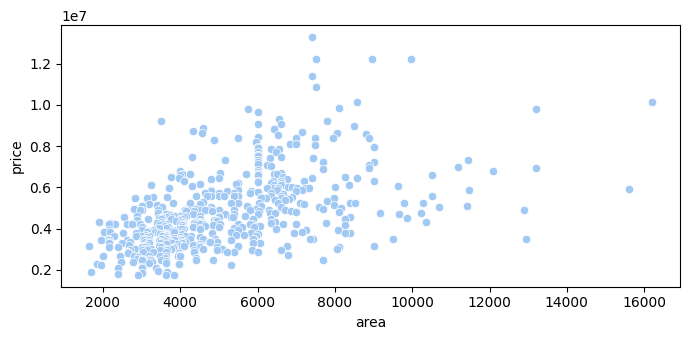

In [18]:
sns.scatterplot(cleaned_data,x='area',y='price')

从散点图可以看出，房价与面积大概呈现正相关的趋势。

#### 卧室数与房价

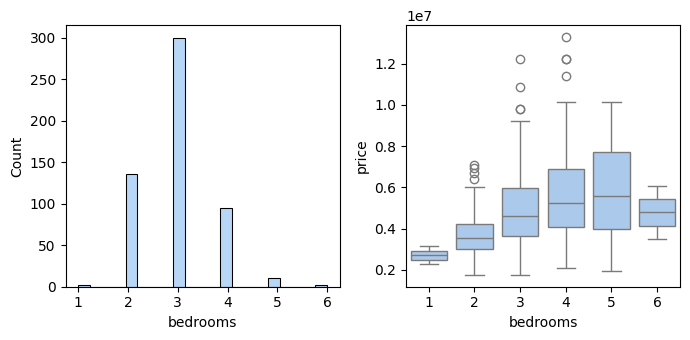

In [19]:
figure,axes = plt.subplots(1,2)
sns.histplot(cleaned_data['bedrooms'],ax=axes[0])
sns.boxplot(cleaned_data,x='bedrooms',y='price',ax=axes[1])
plt.show()

此数据集中在房子的卧室数范围为1~6个，其中大多数房子有2~4个卧室。

从平均房价与卧室数的柱状图来看，当卧室数小于5个时，卧室数多的房子价格也相应提高，但一旦多于5个以后，房价并不一定相应提高。

#### 洗手间与房价

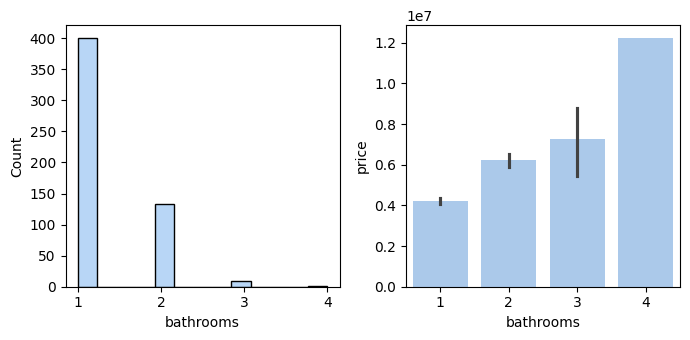

In [20]:
figure,axes = plt.subplots(1,2)
sns.histplot(cleaned_data['bathrooms'],ax=axes[0])
sns.barplot(cleaned_data,x='bathrooms',y='price',ax=axes[1])
plt.show()

数据集中房子洗手间的数量最少为1个，最多为4个，其中1个的数量最多。

从平均房价与洗手间之间的柱状图来看，洗手间多的房子价格也相应更高。

#### 楼层数与房价

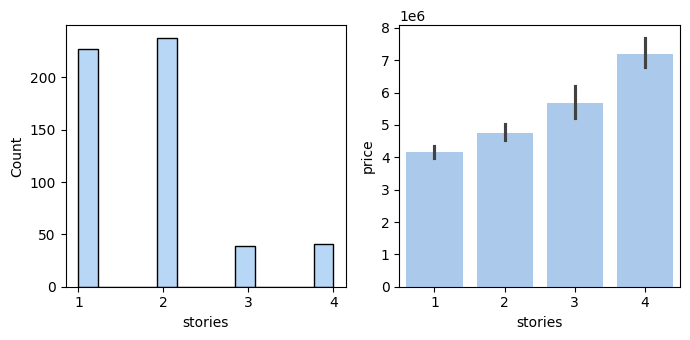

In [21]:
figure,axes = plt.subplots(1,2)
sns.histplot(cleaned_data['stories'],ax=axes[0])
sns.barplot(cleaned_data,x='stories',y='price',ax=axes[1])
plt.show()

房子的楼层范围为1~4层，其中大多数房子有1~2层。

从平均房价与楼层数之间的柱状图来看，楼层数多的房子其房价也更高。

#### 车库数与房价

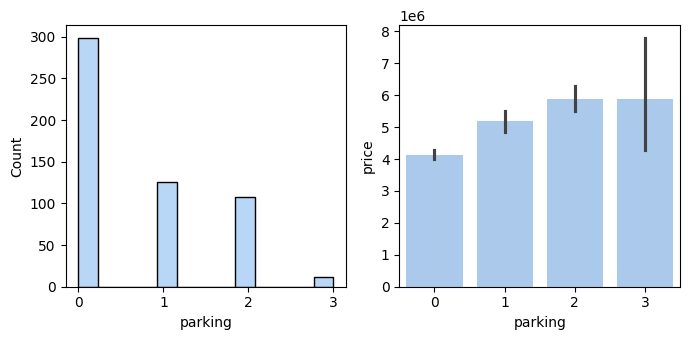

In [22]:
figure,axes = plt.subplots(1,2)
sns.histplot(cleaned_data['parking'],ax=axes[0])
sns.barplot(cleaned_data,x='parking',y='price',ax=axes[1])
plt.show()

房子的车库数围为0~3个，其中大多数房子有0个。

从平均房价与车库数之间的柱状图来看，车库数多的房子其房价也更高，但超过2个之后，房价不一定相应更高。

#### 是否在主路

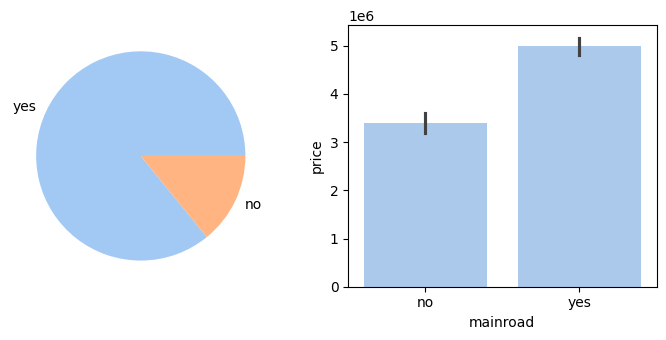

In [23]:
figure,axes = plt.subplots(1,2)
mainroad_count=cleaned_data['mainroad'].value_counts()
mainroad_label=mainroad_count.index
axes[0].pie(mainroad_count,labels=mainroad_label)
sns.barplot(cleaned_data,x='mainroad',y='price',ax=axes[1])
plt.show()

房子大多数位于主路。

从平均房价与房子是否在主路上的关系来看，主路上的房子平均房价更高。

### 分析数据

在分析数据时，利用cleaned_data来进行线性回归分析，目的是得到一个可以用来根据房子的各个属性来预测房价的模型。

下面先引入线性回归模型的模块。

In [24]:
import statsmodels.api as sm

新创建一个DataFrame：lr_house_price,让其作为进行线性回归分析所用的数据。

和cleaned_data区分开来是为了，在进行线性回归前，还需要对数据进行一些处理，比如：引入虚拟变量。

In [25]:
lr_house_price=cleaned_data.copy()
lr_house_price

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished
...,...,...,...,...,...,...,...,...,...,...,...,...,...
540,1820000,3000,2,1,1,yes,no,yes,no,no,2,no,unfurnished
541,1767150,2400,3,1,1,no,no,no,no,no,0,no,semi-furnished
542,1750000,3620,2,1,1,yes,no,no,no,no,0,no,unfurnished
543,1750000,2910,3,1,1,no,no,no,no,no,0,no,furnished


由于数据里存在分类变量，无法直接建立线性回归模型，我们需要引入虚拟变量，也就是用0和1来分别表示是否属于该分类。

In [26]:
lr_house_price=pd.get_dummies(lr_house_price,drop_first=True,columns=['mainroad','guestroom','basement','hotwaterheating','airconditioning','prefarea','furnishingstatus'],dtype=int)
lr_house_price.head()

,price,area,bedrooms,bathrooms,stories,parking,mainroad_yes,guestroom_yes,basement_yes,hotwaterheating_yes,airconditioning_yes,prefarea_yes,furnishingstatus_semi-furnished,furnishingstatus_unfurnished
0,13300000,7420,4,2,3,2,1,0,0,0,1,1,0,0
1,12250000,8960,4,4,4,3,1,0,0,0,1,0,0,0
2,12250000,9960,3,2,2,2,1,0,1,0,0,1,1,0
3,12215000,7500,4,2,2,3,1,0,1,0,1,1,0,0
4,11410000,7420,4,1,2,2,1,1,1,0,1,0,0,0


接下来，我们要把因变量和自变量区分出来。

因变量是：price变量。

In [27]:
y = lr_house_price['price']

我们可以把除了price以外的变量都当作自变量，但我们需要查看它们之间的相关性。如果其中有些变量之间的相关性很高，会导致共线性问题。

In [28]:
x =lr_house_price.drop('price',axis=1)
x.corr().abs()>0.8

,area,bedrooms,bathrooms,stories,parking,mainroad_yes,guestroom_yes,basement_yes,hotwaterheating_yes,airconditioning_yes,prefarea_yes,furnishingstatus_semi-furnished,furnishingstatus_unfurnished
area,True,False,False,False,False,False,False,False,False,False,False,False,False
bedrooms,False,True,False,False,False,False,False,False,False,False,False,False,False
bathrooms,False,False,True,False,False,False,False,False,False,False,False,False,False
stories,False,False,False,True,False,False,False,False,False,False,False,False,False
parking,False,False,False,False,True,False,False,False,False,False,False,False,False
mainroad_yes,False,False,False,False,False,True,False,False,False,False,False,False,False
guestroom_yes,False,False,False,False,False,False,True,False,False,False,False,False,False
basement_yes,False,False,False,False,False,False,False,True,False,False,False,False,False
hotwaterheating_yes,False,False,False,False,False,False,False,False,True,False,False,False,False
airconditioning_yes,False,False,False,False,False,False,False,False,False,True,False,False,False


从以上的输出的结果来看，不同变量之间相关性的绝对值高于0.8的变量不存在。

接下来，给模型的线性方程添加截距。

In [29]:
x=sm.add_constant(x)
x

,const,area,bedrooms,bathrooms,stories,parking,mainroad_yes,guestroom_yes,basement_yes,hotwaterheating_yes,airconditioning_yes,prefarea_yes,furnishingstatus_semi-furnished,furnishingstatus_unfurnished
0,1.0,7420,4,2,3,2,1,0,0,0,1,1,0,0
1,1.0,8960,4,4,4,3,1,0,0,0,1,0,0,0
2,1.0,9960,3,2,2,2,1,0,1,0,0,1,1,0
3,1.0,7500,4,2,2,3,1,0,1,0,1,1,0,0
4,1.0,7420,4,1,2,2,1,1,1,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
540,1.0,3000,2,1,1,2,1,0,1,0,0,0,0,1
541,1.0,2400,3,1,1,0,0,0,0,0,0,0,1,0
542,1.0,3620,2,1,1,0,1,0,0,0,0,0,0,1
543,1.0,2910,3,1,1,0,0,0,0,0,0,0,0,0


下一步就可以调用ols函数，利用最小二乘法来得到线性回归模型的参数值。

In [30]:
model=sm.OLS(y,x).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.682
Model:                            OLS   Adj. R-squared:                  0.674
Method:                 Least Squares   F-statistic:                     87.52
Date:                Sat, 16 Nov 2024   Prob (F-statistic):          9.07e-123
Time:                        17:50:53   Log-Likelihood:                -8331.5
No. Observations:                 545   AIC:                         1.669e+04
Df Residuals:                     531   BIC:                         1.675e+04
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
===================================================================================================
                                      coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------------
const                            4.277e+04   2.64e+05      0.162      0.872   -4.76e+05    5.62e+05
area                              244.1394     24.289     10.052      0.000     196.425     291.853
bedrooms                         1.148e+05   7.26e+04      1.581      0.114   -2.78e+04    2.57e+05
bathrooms                        9.877e+05   1.03e+05      9.555      0.000    7.85e+05    1.19e+06
stories                          4.508e+05   6.42e+04      7.026      0.000    3.25e+05    5.77e+05
parking                          2.771e+05   5.85e+04      4.735      0.000    1.62e+05    3.92e+05
mainroad_yes                     4.213e+05   1.42e+05      2.962      0.003    1.42e+05    7.01e+05
guestroom_yes                    3.005e+05   1.32e+05      2.282      0.023    4.18e+04    5.59e+05
basement_yes                     3.501e+05    1.1e+05      3.175      0.002    1.33e+05    5.67e+05
hotwaterheating_yes              8.554e+05   2.23e+05      3.833      0.000    4.17e+05    1.29e+06
airconditioning_yes               8.65e+05   1.08e+05      7.983      0.000    6.52e+05    1.08e+06
prefarea_yes                     6.515e+05   1.16e+05      5.632      0.000    4.24e+05    8.79e+05
furnishingstatus_semi-furnished -4.634e+04   1.17e+05     -0.398      0.691   -2.75e+05    1.83e+05
furnishingstatus_unfurnished    -4.112e+05   1.26e+05     -3.258      0.001   -6.59e+05   -1.63e+05
==============================================================================
Omnibus:                       97.909   Durbin-Watson:                   1.209
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              258.281
Skew:                           0.895   Prob(JB):                     8.22e-57
Kurtosis:                       5.859   Cond. No.                     3.49e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.49e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

由以上的图表来看，我们把显著区间设定为0.05时，以上的结果的p值中有三个是大于0.05的，分别是const与furnishingstatus_semi-furnished，

bedrooms需要移除这俩个变量后再重新建立模型。

In [31]:
x=x.drop(['const','bedrooms','furnishingstatus_semi-furnished'],axis=1)

In [37]:
model = sm.OLS(y,x).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                  price   R-squared (uncentered):                   0.957
Model:                            OLS   Adj. R-squared (uncentered):              0.956
Method:                 Least Squares   F-statistic:                              1088.
Date:                Sat, 16 Nov 2024   Prob (F-statistic):                        0.00
Time:                        17:51:51   Log-Likelihood:                         -8333.5
No. Observations:                 545   AIC:                                  1.669e+04
Df Residuals:                     534   BIC:                                  1.674e+04
Df Model:                          11                                                  
Covariance Type:            nonrobust                                                  
================================================================================================
                                   coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------
area                           257.5854     22.577     11.409      0.000     213.234     301.936
bathrooms                     1.071e+06   9.27e+04     11.553      0.000    8.89e+05    1.25e+06
stories                       5.084e+05   5.71e+04      8.898      0.000    3.96e+05    6.21e+05
parking                       2.793e+05   5.83e+04      4.794      0.000    1.65e+05    3.94e+05
mainroad_yes                  4.672e+05   1.27e+05      3.679      0.000    2.18e+05    7.17e+05
guestroom_yes                 2.851e+05   1.31e+05      2.172      0.030    2.72e+04    5.43e+05
basement_yes                  4.016e+05   1.07e+05      3.765      0.000    1.92e+05    6.11e+05
hotwaterheating_yes           8.668e+05   2.23e+05      3.884      0.000    4.28e+05    1.31e+06
airconditioning_yes           8.543e+05   1.07e+05      7.952      0.000    6.43e+05    1.07e+06
prefarea_yes                  6.443e+05   1.15e+05      5.594      0.000    4.18e+05    8.71e+05
furnishingstatus_unfurnished -3.493e+05   9.49e+04     -3.679      0.000   -5.36e+05   -1.63e+05
==============================================================================
Omnibus:                       94.840   Durbin-Watson:                   1.262
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              251.889
Skew:                           0.865   Prob(JB):                     2.01e-55
Kurtosis:                       5.845   Cond. No.                     2.74e+04
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[3] The condition number is large, 2.74e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

我们看到，当我们把p值较大的自变量从线性回归模型中移除后，R方的值从0.682增长到了0.957，提高了0.325。这说明，这些自变量对因变量的解释能力更强。


面积为6500平方英尺，有4个卧室、2个厕所，总共2层，不位于主路，无客人房，带地下室，有热水器，没有空调，车位数为2，位于城市首选社区，简装修。

In [45]:
price_to_predict=pd.DataFrame({'area':[5600],'bedrooms':[4],'bathrooms':[2],
                               'stories':[2],'mainroad':['no'],'guestroom':['no'],
                               'basement':['yes'],'hotwaterheating':['yes'],
                               'airconditioning':['no'],'parking':2,'prefarea':['yes'],
                               'furnishingstatus':['semi_furnished']})
price_to_predict

,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,5600,4,2,2,no,no,yes,yes,no,2,yes,semi_furnished


需要把分类变量的类型转换为Category类型，并且通过categories参数，让程序知道所有的可能的分类值。

In [46]:
price_to_predict['mainroad']=pd.Categorical(price_to_predict['mainroad'],categories=['yes','no'])
price_to_predict['guestroom']=pd.Categorical(price_to_predict['guestroom'],categories=['yes','no'])
price_to_predict['basement']=pd.Categorical(price_to_predict['basement'],categories=['yes','no'])
price_to_predict['hotwaterheating']=pd.Categorical(price_to_predict['hotwaterheating'],categories=['yes','no'])
price_to_predict['airconditioning']=pd.Categorical(price_to_predict['airconditioning'],categories=['yes','no'])
price_to_predict['prefarea']=pd.Categorical(price_to_predict['prefarea'],categories=['yes','no'])
price_to_predict['furnishingstatus']=pd.Categorical(price_to_predict['furnishingstatus'],categories=['furnished','semi-furnished','unfurnished'])
price_to_predict.head()

,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,5600,4,2,2,no,no,yes,yes,no,2,yes,NaN


In [47]:
price_to_predict = pd.get_dummies(price_to_predict,drop_first=True,columns=['mainroad','guestroom',
                                                                            'basement','hotwaterheating',
                                                                            'airconditioning','prefarea',
                                                                            'furnishingstatus'],dtype=int)
price_to_predict.head()

,area,bedrooms,bathrooms,stories,parking,mainroad_no,guestroom_no,basement_no,hotwaterheating_no,airconditioning_no,prefarea_no,furnishingstatus_semi-furnished,furnishingstatus_unfurnished
0,5600,4,2,2,2,1,1,0,0,1,0,0,0


In [48]:
price_to_predict =price_to_predict.drop(['bedrooms','furnishingstatus_semi-furnished'],axis=1)

接下来就可以调用线性回归模型的predict方法进行预测了：

In [49]:
predicted_value = model.predict(price_to_predict)
predicted_value

0    6.765868e+06
dtype: float64

线性回归模型预测的价格为：6765868。